In [1]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers

# Configs

In [10]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000

# Datasets

In [7]:
dataset, info = tfds.load('imdb_reviews/subwords8k',
                          with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [8]:
encoder = info.features['text'].encoder

print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [9]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [11]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

# Models

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


# Training

In [15]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 569s 1s/step - loss: 0.6258 - accuracy: 0.6197 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 492s 1s/step - loss: 0.3262 - accuracy: 0.8700 - val_loss: 0.3440 - val_accuracy: 0.8599
Epoch 3/10
391/391 [==============================] - 467s 1s/step - loss: 0.2520 - accuracy: 0.9071 - val_loss: 0.3117 - val_accuracy: 0.8693
Epoch 4/10
391/391 [==============================] - 467s 1s/step - loss: 0.2070 - accuracy: 0.9273 - val_loss: 0.3096 - val_accuracy: 0.8839
Epoch 5/10
391/391 [==============================] - 463s 1s/step - loss: 0.1782 - accuracy: 0.9380 - val_loss: 0.3181 - val_accuracy: 0.8786
Epoch 6/10
391/391 [==============================] - 462s 1s/step - loss: 0.1577 - accuracy: 0.9480 - val_loss: 0.3487 - val_accuracy: 0.8604
Epoch 7/10
391/391 [==============================] - 462s 1s/step - loss: 0.1581 - accuracy: 0.9467 - val_loss: 0.3727 - val_accuracy: 0.8714
Ep

# Evaluation

In [17]:
def pad_to_size(vec, size):
    zeros = [0] * (size - len(vec))
    vec.extend(zeros)
    
    return vec

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
def sample_predict(sentence, pad):
    encoded_sample_pred_text = encoder.encode(sample_pred_text)

    if pad:
        encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
        encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
        predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

    return (predictions)

In [16]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 255s 653ms/step - loss: 0.4362 - accuracy: 0.8597Test Loss: 0.4362446354020892
Test Accuracy: 0.85971999168396


In [18]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)

print (predictions)

[[0.46021765]]


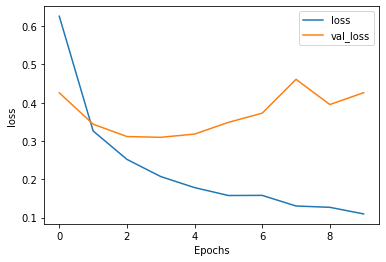

In [20]:
plot_graphs(history, 'loss')

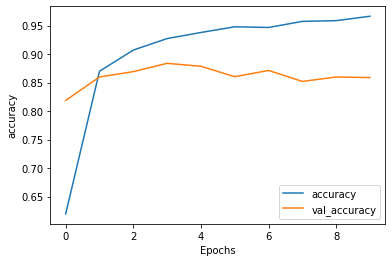

In [19]:
plot_graphs(history, 'accuracy')